#### This notebook performs data cleaning and filtering to remove unnecessary columns and rows with null values. Columns with expected predictive ability for book rating were kept.

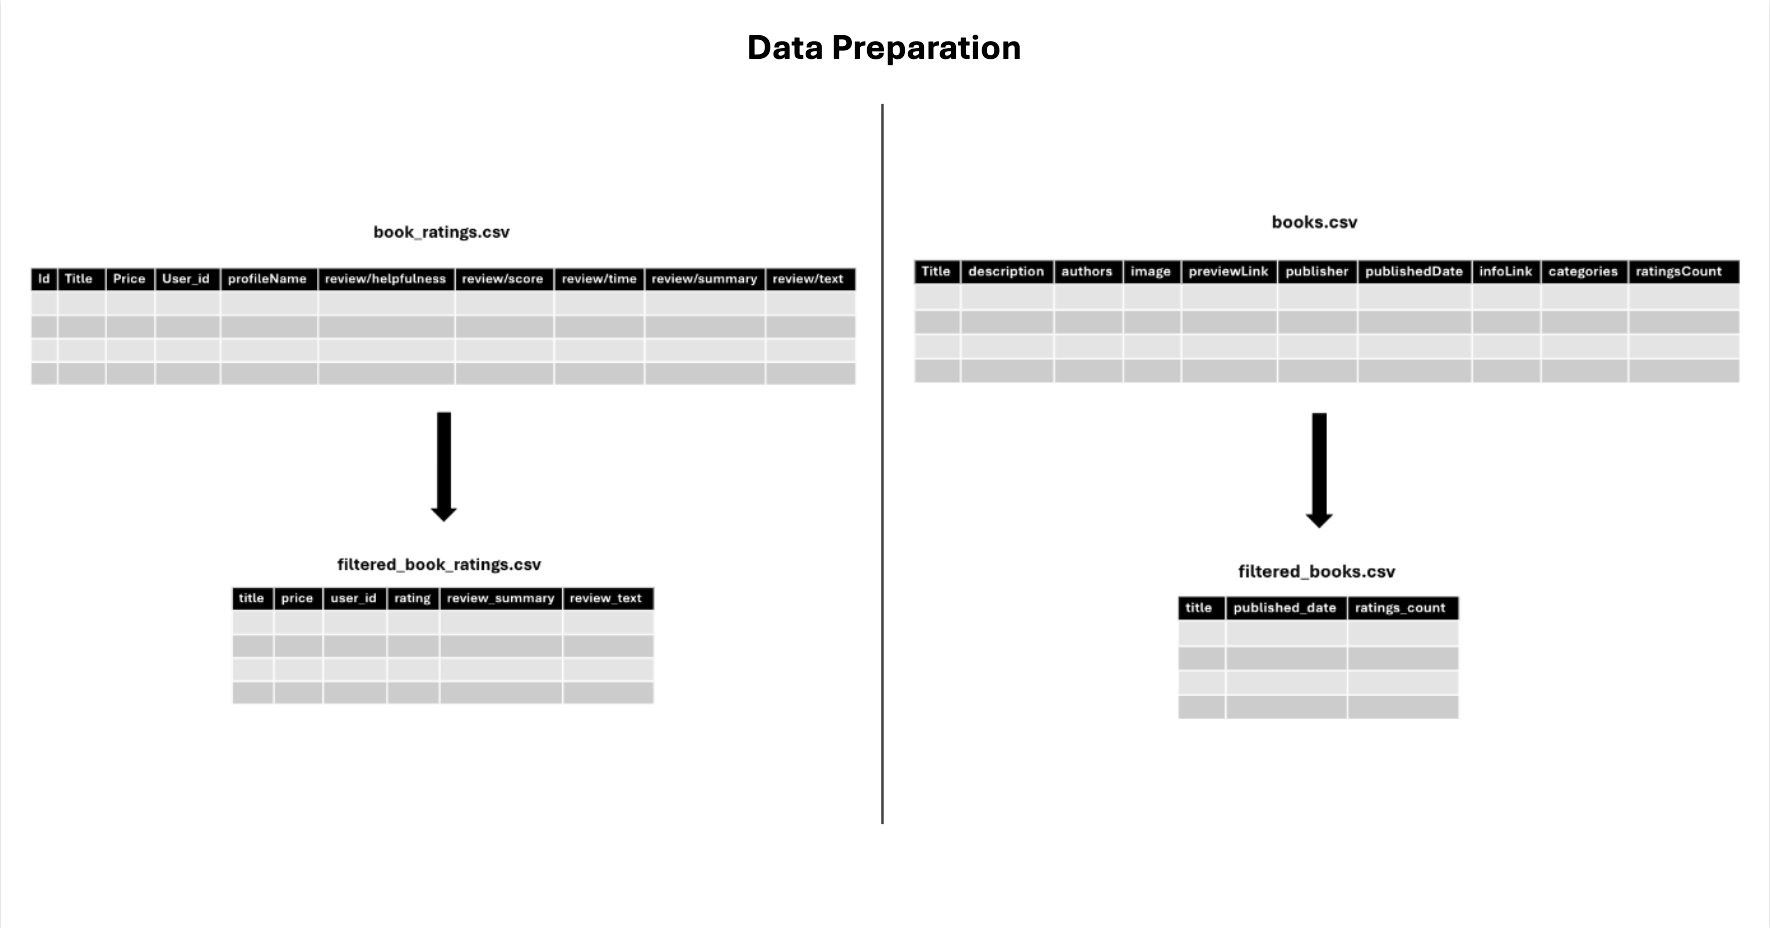

In [85]:
import pandas as pd
import re

books_raw_file_path = './data/raw/books.csv'
book_reviews_raw_file_path = './data/raw/book_reviews.csv'

books_refined_file_path = './data/refined/filtered_books.csv'
book_reviews_refined_file_path = './data/refined/filtered_book_ratings.csv'

In [6]:
def get_csv_chunk(csv_file_path, columns_to_select, chunksize):
    for chunk in pd.read_csv(csv_file_path, usecols=columns_to_select, chunksize=chunksize):
        yield chunk

In [29]:
header = True
for chunk in get_csv_chunk(books_raw_file_path, ['Title', 'publishedDate', 'ratingsCount'], 100000):
    chunk = chunk.rename(columns={'Title': 'title', 'ratingsCount': 'ratings_count', 'publishedDate': 'published_date'})
    chunk["published_date"] = chunk["published_date"].apply(lambda x: None if re.search(r'\d{4}', str(x)) is None else re.search(r'\d{4}', str(x)).group(0))
    chunk = chunk.dropna(axis=0)
    chunk.to_csv(books_refined_file_path, header=header, columns=['title', 'published_date', 'ratings_count'], mode='a')
    header = False

In [37]:
header = True
for chunk in get_csv_chunk(book_reviews_raw_file_path, ["User_id", "Title", "Price", "review/score", "review/text", "review/summary"], 100000):
    chunk = chunk.rename(columns={'User_id': 'user_id', 'Title': 'title', "Price": "price", 'review/score': 'rating', 'review/text': 'review_text', 'review/summary': 'review_summary'})
    chunk = chunk.dropna(axis=0)
    chunk.to_csv(book_reviews_refined_file_path, header=header, columns=['user_id', 'title', 'price', 'rating', 'review_text', 'review_summary'], mode='a')
    header = False